# Rankbreeze - Task Overview

**Applicant Information**<br>
> **Name:** Gabriel Merida Margonato de Oliveira<br>
> **Date**: Jan 23rd, 2023<br>
> **LinkedIn:** https://www.linkedin.com/in/gabrielmargonato/

Airbnb Listing: https://www.airbnb.com/rooms/53274690 

**Tasks:**
- 1) Recommend the best & most likely competitors for this Airbnb property
- 2) Recommend an optimal nightly price for the next 90 days for this property
- 3) This property is a high-converting property & in the top 1% of properties in the city. What correlations are possible to explore with this property against other properties?
___


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Display all columns
pd.options.display.max_columns = None

# Data Acquisiton

In [ ]:
# Connection to Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [3]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/ML Projects/AirBnB Dataset/Nashville Properties - V2.csv', sep=',')
df.tail()

,id,listing_url,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
7728,583169313478293083,https://www.airbnb.com/rooms/583169313478293083,Stylish condo minutes from Music City Nashville,"This bright, stylish residential condo is the ...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,358890755,https://www.airbnb.com/users/show/358890755,Bridgette,2020-07-27,"Cincinnati, OH",NaN,within an hour,100%,96%,f,https://a0.muscache.com/im/pictures/user/58015...,NaN,1.0,1.0,"['email', 'phone']",t,t,NaN,District 33,NaN,36.03292,-86.55033,Entire condo,Entire home/apt,6,NaN,2.5 baths,2.0,2.0,"[""Luggage dropoff allowed"", ""Suave shampoo"", ""...",$124.00,2,1125,t,0,0,0,0,2022-09-16,8,8,0,2022-04-01,2022-07-03,4.75,4.88,5.00,5.00,4.88,4.38,4.75,NaN,t,1,1,0,0,1.42
7729,36750124,https://www.airbnb.com/rooms/36750124,Hermitage monthly or longer/2 people max cozy ...,"Nashville/Hermitage, Close to AIRPORT, Cute an...","10 minutes to lakes, marinas, outdoor events. ...",https://a0.muscache.com/pictures/b5741753-9636...,232237589,https://www.airbnb.com/users/show/232237589,Dawn,2018-12-24,"Nashville, TN",NaN,a few days or more,0%,67%,f,https://a0.muscache.com/im/pictures/user/594de...,NaN,3.0,5.0,"['email', 'phone']",t,t,"Green Hill, Tennessee, United States",District 11,NaN,36.23056,-86.58869,Entire home,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Carbon monoxide alarm"", ""Refrigerator"", ""Ess...",$90.00,30,90,t,13,29,47,47,2022-09-15,3,0,0,2019-10-31,2020-03-28,4.67,5.00,4.67,5.00,5.00,5.00,5.00,NaN,f,3,2,0,1,0.09
7730,48625334,https://www.airbnb.com/rooms/48625334,A spacious and updated 3 bed 2 1/2 townhome!,A spacious 3 bed 2 1/2 bath townhome in La Ver...,NaN,https://a0.muscache.com/pictures/fb28f289-0ff2...,366156295,https://www.airbnb.com/users/show/366156295,Elizaveta,2020-09-05,"Biloxi, MS","Hello! I am Ellie. I grew up in NYC, but moved...",within an hour,100%,99%,t,https://a0.muscache.com/im/pictures/user/a0a61...,NaN,1.0,2.0,"['email', 'phone', 'work_email']",t,f,NaN,District 33,NaN,36.01874,-86.56241,Entire townhouse,Entire home/apt,6,NaN,2.5 baths,3.0,3.0,"[""Luggage dropoff allowed"", ""Refrigerator"", ""E...",$100.00,1,1125,t,0,0,0,0,2022-09-16,154,93,0,2021-03-17,2022-08-14,4.87,4.90,4.92,4.96,4.88,4.69,4.86,NaN,t,1,1,0,0,8.42
7731,648366484239998665,https://www.airbnb.com/rooms/648366484239998665,1 bedroom Home 25min to downtown Nashville,Take a break and unwind at this peaceful oasis...,NaN,https://a0.muscache.com/pictures/a322e82e-ebcc...,12151120,https://www.airbnb.com/users/show/12151120,Nick,2014-02-11,"La Vergne, TN",Hi Im Nick. Or many people in the Music Indus...,a few days or more,40%,95%,f,https://a0.muscache.com/im/users/12151120/prof...,NaN,2.0,2.0,"['email', 'phone']",t,f,NaN,District 33,NaN,36.02812,-86.54871,Entire home,Entire home/apt,4,NaN,1.5 baths,1.0,2.0,"[""Body soap"", ""Luggage dropoff allowed"", ""Carb...",$204.00,1,365,t,30,60,90,364,2022-09-16,2,2,0,2022-06-26,2

In [4]:
# Finding our target listing in the Dataset
df[df["listing_url"] == 'https://www.airbnb.com/rooms/53274690']

,id,listing_url,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
5196,53274690,https://www.airbnb.com/rooms/53274690,Stunning 6 Beds Condo Near Downtown - Parking+...,"STUNNING 2 Bedroom, 1 Bath & 6 BEDS condo with...",NaN,https://a0.muscache.com/pictures/prohost-api/H...,4910520,https://www.airbnb.com/users/show/4910520,Amy,2013-01-30,"Nashville, TN",You'll love staying at our condos. They are al...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/6afc7...,Midtown,25.0,35.0,"['email', 'phone', 'work_email']",t,t,NaN,District 21,NaN,36.15933,-86.80582,Entire condo,Entire home/apt,8,NaN,1 bath,2.0,6.0,"[""Body soap"", ""Carbon monoxide alarm"", ""Refrig...",$372.00,1,1125,t,10,31,61,333,2022-09-15,63,63,3,2021-11-12,2022-08-26,5.0,4.97,4.98,4.92,4.98,4.78,4.84,NaN,t,14,14,0,0,6.14


# Exploratory Data Analysis

In [5]:
# Dataset size (rows = listings, columns = features)
df.shape

(7733, 64)

id                                                 0
listing_url                                        0
name                                               0
description                                       42
neighborhood_overview                           2231
picture_url                                        0
host_id                                            0
host_url                                           0
host_name                                         80
host_since                                        80
host_location                                   1177
host_about                                      2350
host_response_time                               844
host_response_rate                               844
host_acceptance_rate                             607
host_is_superhost                                  1
host_picture_url                                  80
host_neighbourhood                              2412
host_listings_count                           

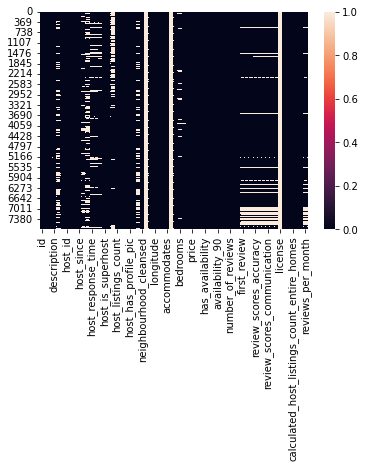

In [6]:
# Checking for missing values
sns.heatmap(df.isna())

print(df.isnull().sum().to_string())

In [7]:
# Creating a copy of our original dataframe to preserv it
df_EDA = df.copy()

## Data Cleansing

There are **multiple ways** to deal with missing values. 

While some features like `review_scores_rating` and `bathrooms_text` could benefit from using **average** to replace nulls, on the other hand, features like `minimum_nights` and `availability_30` could benefit from filling with **zero**.

As a MVP, we will be dropping the columns wich are entirely empty and fill the nulls with 0.

In [8]:
# Handling empty values

# Drop empty columns
df_EDA = df_EDA.dropna(axis=1, how='all')

# Fill missing values with 0 if numeric
df_EDA = df_EDA.applymap(lambda x: 0 if pd.isna(x) and isinstance(x, (int, float)) else x)

In [9]:
# Handling string columns

df_EDA = df_EDA.drop(columns=[
    'listing_url',
    'name',
    'description',
    #'latitude',
    #'longitude',
    'neighborhood_overview',
    'picture_url',
    'host_id',	
    'host_url',
    'host_name',
    'host_location',
    'host_about',
    'host_response_time',
    'host_picture_url',
    'host_neighbourhood',
    'host_verifications',
    'host_has_profile_pic',
    'neighbourhood',
    'neighbourhood_cleansed',
    #'neighbourhood_group_cleansed',	
    #'license',
    'property_type', 
    'bathrooms_text',	
    'amenities', 
    'calendar_last_scraped',	
    'first_review',	
    'last_review',
    'host_since',
    #'bathrooms'
])

df_EDA['host_response_rate']    = df_EDA['host_response_rate'].str.rstrip('%').astype('float') / 100.0
df_EDA['host_acceptance_rate']  = df_EDA['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0
df_EDA['host_is_superhost'].replace({'f': 0, 't': 1}, inplace=True)
df_EDA['host_identity_verified'].replace({'f': 0, 't': 1}, inplace=True)
df_EDA['has_availability'].replace({'f': 0, 't': 1}, inplace=True)
df_EDA['instant_bookable'].replace({'f': 0, 't': 1}, inplace=True)

# Room type
df_EDA['room_type'].replace(
    {
        'Private room': 1, 
        'Entire home/apt': 2,
        'Shared room' : 3,
        'Hotel room' : 4
    }, inplace=True
)

# Price
df_EDA['price'] = df_EDA['price'].str.replace('$', '')
df_EDA['price'] = df_EDA['price'].str.replace(',', '')
df_EDA['price'] = df_EDA['price'].astype(float)

df_EDA.tail()

<ipython-input-9-2fd60c5c4565>:53: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_EDA['price'] = df_EDA['price'].str.replace('$', '')


,id,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,latitude,longitude,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
7728,583169313478293083,1.0,0.96,0,1.0,1.0,1,36.03292,-86.55033,2,6,2.0,2.0,124.0,2,1125,1,0,0,0,0,8,8,0,4.75,4.88,5.00,5.00,4.88,4.38,4.75,1,1,1,0,0,1.42
7729,36750124,0.0,0.67,0,3.0,5.0,1,36.23056,-86.58869,2,2,1.0,1.0,90.0,30,90,1,13,29,47,47,3,0,0,4.67,5.00,4.67,5.00,5.00,5.00,5.00,0,3,2,0,1,0.09
7730,48625334,1.0,0.99,1,1.0,2.0,0,36.01874,-86.56241,2,6,3.0,3.0,100.0,1,1125,1,0,0,0,0,154,93,0,4.87,4.90,4.92,4.96,4.88,4.69,4.86,1,1,1,0,0,8.42
7731,648366484239998665,0.4,0.95,0,2.0,2.0,0,36.02812,-86.54871,2,4,1.0,2.0,204.0,1,365,1,30,60,90,364,2,2,0,5.00,4.50,4.50,4.50,4.50,3.50,4.50,0,2,1,1,0,0.72
7732,8105862,0.4,0.95,0,2.0,2.0,0,36.02804,-86.54957,1,2,1.0,1.0,99.0,1,365,1,30,60,90,364,9,9,0,4.67,4.89,4.89,4.67,4.78,4.78,4.78,0,2,1,1,0,1.62


## Feature Selection

Feature selection is very important in machine learning for a few reasons, such as:

- **Performance:** It improves the performance of the model by removing irrelevant or redundant features. This can help prevent overfitting and reduce the computation time required to train a model.

- **Explainability:** makes it easier to interpret and understand the data. This can be especially useful when working with complex datasets, or when trying to explain the model to non-technical stakeholders.

- **Customer recommendation:** Feature selection can help identify the key elements of a customer's business, which can be used to make recommendations or provide insights.

However, it is important to note that there is a **trade-off** when using feature selection. Removing features can potentially impact the model's performance, particularly if the removed features contain important information.

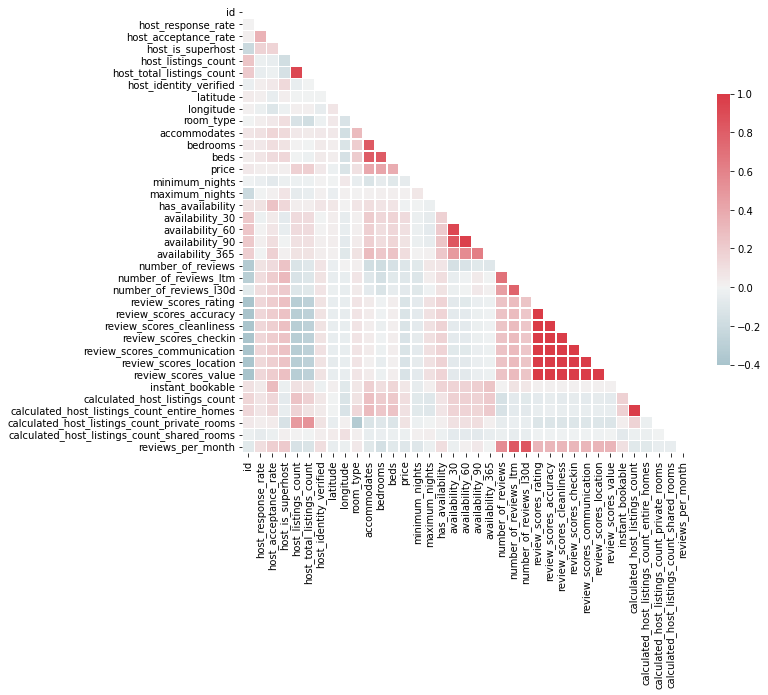

In [10]:
# Plot a correlation matrix

corr = df_EDA.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(
    corr, 
    mask=mask, 
    cmap=cmap, 
    vmax=1, 
    center=0,
    square=True, 
    linewidths=.5, 
    cbar_kws={"shrink": .5}
)

Let's use `VarianceThreshold` from scikit-learn to help us determine the best features for our analysis.
<br>
From the correlation matrix above, we will be selecting **0.8 as our threshold value** 

In [11]:
from sklearn.feature_selection import VarianceThreshold

In [12]:
# Create an instance of the VarianceThreshold class
vt = VarianceThreshold(threshold = 0.8)

# Fit the VarianceThreshold on your data
vt.fit(df_EDA)

# Get the indices of the features that passed the variance threshold
indices = vt.get_support(indices=True)

# Select the features that passed the threshold
features = df_EDA.iloc[:, indices].columns.to_list()

# Print
print(len(features),"features selected:")
features

27 features selected:


['id',
 'host_listings_count',
 'host_total_listings_count',
 'accommodates',
 'bedrooms',
 'beds',
 'price',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'reviews_per_month']

In [13]:
features_to_normalize = [col for col in df_EDA.columns if col not in ['id', 'price']]

# 1) Competitors Analysis

**Task:** Recommend the best & most likely competitors for this Airbnb property

In [51]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler

# Scale the data
scaler = MinMaxScaler()

In [52]:
scaler.fit(df_EDA[features_to_normalize])

# Create a new dataframe with the normalized data. 
# Also deals with missing values inputing the mean of the column.
df_scaled = pd.DataFrame(scaler.transform(df_EDA[features_to_normalize]), columns = features_to_normalize)
df_scaled.fillna(df_scaled.mean(), inplace=True)

# Append the 'id' and 'price' columns to the new dataframe
df_scaled[['id', 'price']] = df_EDA[['id', 'price']]

## KNN Model

In [53]:
# Create & fit the KNN model

num_of_neighbors = 4

knn = KNeighborsRegressor(n_neighbors = num_of_neighbors)
knn.fit(df_scaled[features_to_normalize], df_scaled['price'])

KNeighborsRegressor(n_neighbors=4)

In [54]:
# Find the most similar listings to our target
target = df_scaled.loc[df_scaled['id'] == 53274690, features_to_normalize]
distances, similar_properties = knn.kneighbors(target, n_neighbors = num_of_neighbors)
id_list = df_scaled.loc[similar_properties[0], 'id']

In [55]:
# Normalize the distances: This will feed the Match Index on our presentation.
scaler.fit(distances.reshape(-1, 1))
distances_normalized = scaler.transform(distances.reshape(-1, 1))
distances_normalized

array([[0.        ],
       [0.86966221],
       [0.93791437],
       [1.        ]])

In [56]:
import json

In [57]:
# list of columns to be included in the JSON
columns = ['id', 'name', 'description', 'price', 'listing_url']

# dictionary to store the selected rows and columns
data = {}

for id in id_list:
    selected_rows = df[df["id"] == id][columns]
    data[id] = selected_rows.to_dict(orient='records')

# Serializing json  
json_object = json.dumps(data, indent = 4) 
print(json_object)

# write the dictionary to a JSON file
#with open('output.json', 'w') as f:
#    json.dump(data, f)

{
    "53274690": [
        {
            "id": 53274690,
            "name": "Stunning 6 Beds Condo Near Downtown - Parking+Pool",
            "description": "STUNNING 2 Bedroom, 1 Bath & 6 BEDS condo with a huge glass garage door. This condo has been used for numerous photo shoots. Located in the 1865 building, which is a  super dynamic & unique building - truly one of a kind. Pool,  Bar Area with a Grill, Gym and Outdoor Seating! Great kitchen for all your cooking needs. FREE gated Parking plus washer/dryer in the unit. Only a short 2 mile Uber away from downtown & 1 mile from Vanderbilt. Walk to 2 blocks to Starbucks. An upscale experience!<br /><br /><b>The space</b><br />2 Bedrooms, 1 Bath, 6 Beds<br /><br />Part of the brand-new community at The 1865, this 2BR luxury condo boasts one-of-a-kind details like a huge glass garage door. Host a cookout by the heated plunge pool, then watch the stars come out on the observation deck!<br /><br />The oldest non-repurposed commercial stru

# 2) Optimal Price

**Task:** Recommend an optimal nightly price for the next 90 days for this property

In [58]:
df_EDA.price.describe()

count     7733.000000
mean       288.516746
std        437.690936
min          0.000000
25%        129.000000
50%        204.000000
75%        323.000000
max      10500.000000
Name: price, dtype: float64

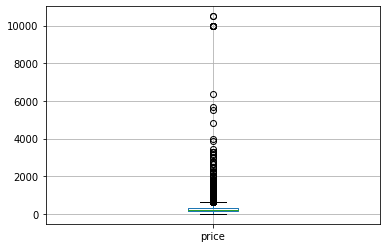

In [59]:
df_EDA.boxplot(column=['price'])

In the Machine Learning industry, it's a common practice to **discard** data that is above the 75th percentile, because such points are considered **outliers**. 

Outliers are values that are significantly different from the rest of the data and **can have a negative impact on the performance of the model**.

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

Empirical studies show that the best results are obtained if we use:
- 20 to 30% of the data for testing
- 80 to 70% of the data for training

We will be conducting our project with **70-30** ratio

Source: https://scholarworks.utep.edu/cs_techrep/1209/

In [62]:
X = df_scaled[features_to_normalize].drop(df_scaled[df_scaled['price'] > 323].index)
y = df_EDA['price'].drop(df_EDA[df_EDA['price'] > 323].index)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3
)

In [130]:
X.shape

(5804, 35)

## Linear Regression Model

In [63]:
# Create an instance of the LinearRegression class
lr = LinearRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

LinearRegression()

In [64]:
predicted_price = lr.predict(df_scaled[df_scaled["id"] == 53274690][features_to_normalize])
print(predicted_price)

[221.8459481]


## Model Evaluation

In [65]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

**Mean Absolute Error (MAE):** The average absolute difference between our predicted values and the actual values.

In [66]:
y_pred = lr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Off by {mae:.2f} dollars")

Off by 45.12 dollars


**Plotting Residuals:** A residual plot is a graph that shows the the difference between the predicted values and the actual values.

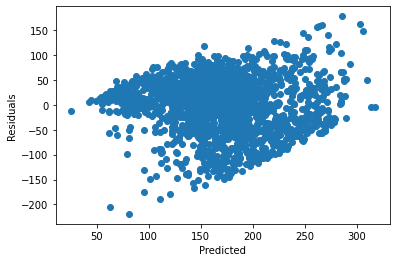

In [67]:
y_pred = lr.predict(X_test)
residuals = y_pred - y_test
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

A perfect model will have a MAE of 0 and the residuals will be randomly scattered around the y-axis. 

However, in practice, the goal is to have the lowest possible MAE and the residuals should be as random as possible.

It would be necessary to **deepen the analyzes** to understand which features best describe the price. However, due to the **short deadline**, we will infer this model as a **first MVP**.

# 3) Correlations

**Task**: This property is a high-converting property & in the top 1% of properties in the city. What correlations are possible to explore with this property against other properties?

1) Filter the highest review_scores_rating

In [118]:
threshold = df_scaled['review_scores_rating'].quantile(0.99)

# Create a new dataframe with the top 1% of highest review_scores_rating
df_top = df_scaled[df_scaled['review_scores_rating'] >= threshold]

df_top = df_top.reset_index(drop = True)
df_top = df_top[features_to_normalize]
df_top.tail()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,latitude,longitude,room_type,accommodates,bedrooms,beds,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
1558,0.0,0.73,0.0,0.002271,0.00030,1.0,0.131617,0.187234,0.333333,0.250,0.090909,0.02,0.000000,0.242829,1.0,0.000000,0.000000,0.133333,0.786301,0.003342,0.002604,0.000000,1.0,0.950,1.000,0.950,1.0,1.000,0.950,0.0,0.028249,0.033708,0.000000,0.0,0.002456
1559,1.0,0.33,0.0,0.000379,0.00005,0.0,0.654577,0.829313,0.333333,0.125,0.090909,0.04,0.029058,0.119413,1.0,0.466667,0.733333,0.822222,0.449315,0.001671,0.002604,0.000000,1.0,1.000,1.000,1.000,1.0,1.000,1.000,0.0,0.000000,0.005618,0.000000,0.0,0.004591
1560,1.0,0.97,0.0,0.000379,0.00005,1.0,0.361215,0.973453,0.333333,0.375,0.136364,0.06,0.000000,0.749833,1.0,0.500000,0.300000,0.366667,0.778082,0.006683,0.010417,0.043860,1.0,1.000,1.000,1.000,1.0,0.976,0.976,0.0,0.000000,0.005618,0.000000,0.0,0.064061
1561,1.0,0.85,1.0,0.000379,0.00005,1.0,0.349710,0.997178,0.333333,0.500,0.136364,0.08,0.001002,0.004003,1.0,0.033333,0.316667,0.544444,0.605479,0.050125,0.011719,0.008772,1.0,0.996,0.996,0.996,1.0,0.990,0.994,0.0,0.000000,0.005618,0.000000,0.0,0.012599
1562,0.4,0.95,0.0,0.000757,0.00010,0.0,0.136500,0.940424,0.333333,0.250,0.045455,0.04,0.000000,0.242829,1.0,1.000000,1.000000,1.000000,0.997260,0.001671,0.002604,0.000000,1.0,0.900,0.900,0.900,0.9,0.700,0.900,0.0,0.005650,0.005618,0.018868,0.0,0.007687


2) New feature `occupancy_score`:
sum (availability_30, availability_30, availability_30) / 180 days


In [119]:
df_top = df_top.assign(
    occupancy_score = df_top['availability_30'] + df_top['availability_60'] + df_top['availability_90']
)
df_top['occupancy_score'] = df_top['occupancy_score']/180
df_top.drop(columns=['availability_30','availability_60','availability_90', 'availability_365'], inplace = True)
df_top.tail()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,latitude,longitude,room_type,accommodates,bedrooms,beds,minimum_nights,maximum_nights,has_availability,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,occupancy_score
1558,0.0,0.73,0.0,0.002271,0.00030,1.0,0.131617,0.187234,0.333333,0.250,0.090909,0.02,0.000000,0.242829,1.0,0.003342,0.002604,0.000000,1.0,0.950,1.000,0.950,1.0,1.000,0.950,0.0,0.028249,0.033708,0.000000,0.0,0.002456,0.000741
1559,1.0,0.33,0.0,0.000379,0.00005,0.0,0.654577,0.829313,0.333333,0.125,0.090909,0.04,0.029058,0.119413,1.0,0.001671,0.002604,0.000000,1.0,1.000,1.000,1.000,1.0,1.000,1.000,0.0,0.000000,0.005618,0.000000,0.0,0.004591,0.011235
1560,1.0,0.97,0.0,0.000379,0.00005,1.0,0.361215,0.973453,0.333333,0.375,0.136364,0.06,0.000000,0.749833,1.0,0.006683,0.010417,0.043860,1.0,1.000,1.000,1.000,1.0,0.976,0.976,0.0,0.000000,0.005618,0.000000,0.0,0.064061,0.006481
1561,1.0,0.85,1.0,0.000379,0.00005,1.0,0.349710,0.997178,0.333333,0.500,0.136364,0.08,0.001002,0.004003,1.0,0.050125,0.011719,0.008772,1.0,0.996,0.996,0.996,1.0,0.990,0.994,0.0,0.000000,0.005618,0.000000,0.0,0.012599,0.004969
1562,0.4,0.95,0.0,0.000757,0.00010,0.0,0.136500,0.940424,0.333333,0.250,0.045455,0.04,0.000000,0.242829,1.0,0.001671,0.002604,0.000000,1.0,0.900,0.900,0.900,0.9,0.700,0.900,0.0,0.005650,0.005618,0.018868,0.0,0.007687,0.016667


3) Use a RandomForestRegressor to extract the best features

In [120]:
from sklearn.ensemble import RandomForestRegressor

In [121]:
features = df_top.drop(['occupancy_score'] , axis = 1)
target = df_top['occupancy_score']

In [122]:
model = RandomForestRegressor(random_state=1, max_depth=12)

data = pd.get_dummies(df_top)
model.fit(features, target)
display(model.feature_importances_)
feat = data.columns

imp = model.feature_importances_
indices = np.argsort(imp)[:]

array([0.04546797, 0.06118737, 0.00835559, 0.03802198, 0.04528983,
       0.00624315, 0.08841385, 0.0780789 , 0.00313697, 0.05163598,
       0.01936572, 0.04876348, 0.06909688, 0.03533706, 0.00027971,
       0.03274324, 0.10796889, 0.01258282, 0.        , 0.00798642,
       0.01392119, 0.007386  , 0.00712713, 0.02770427, 0.02226821,
       0.00917699, 0.03290568, 0.02357783, 0.00989065, 0.00025988,
       0.08582637])

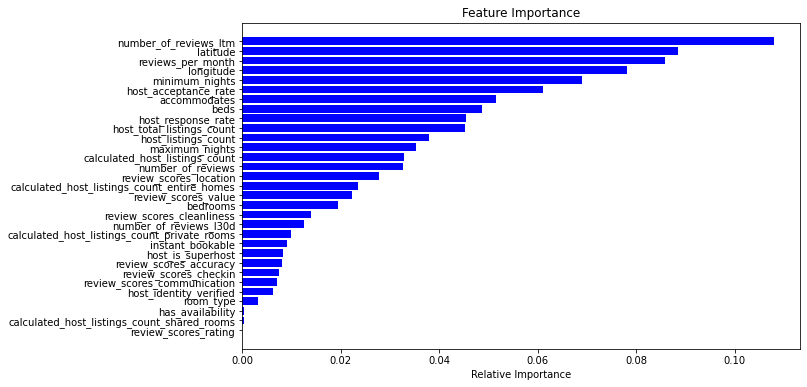

In [124]:
plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.barh(range(len(indices)), imp[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feat[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

4) Understanding the Correlation

Assuming that the "top 1% of properties in the city" is related to the rating (review_scores_rating), and that the high-conversion rate is inferred considering how "busy" the property is rented in a recent time frame, and through the RandomForest regression model and the Feature Importances graph above:
- Reviews, both in the last month as well in the last 12 months
- Location of the property (latitude/longitude)
- Number of guests, beds, bedrooms
- Host information

These are some of the interesting features to explore in the analysis to understand why these properties are so successful.